# 3 Period English Analysis

## [1. Moduel Import]

## [2. Data Load]

## [3. Preprocess]

#### 3-1) Data Cleaning

#### 3-2) Tokenize

#### 3-3) Remove Stopwords

#### 3-4) Tagging

## [4. Analysis]

#### 4-1) Frequency
- 분석 1) 전체 Text에서의 Frequency (상위 30개)
- 분석 2) 각 POS('noun', 'verb', ...)별 분포와 비율
- 분석 3) 'noun'인 token들의 Frequncy (상위 30개)
- 분석 4) 'verb'인 token들의 Frequncy (상위 30개)
- 분석 5) 'adjective'인 token들의 Frequncy (상위 30개)
- 각 분석에 대해 StopWord 제거 이전과 이후에 대한 시각화를 모두 진행하였습니다.

#### 4-2) WordCloud

#### 4-3) Topic Modeling (LDA)
- 토픽의 개수(NUM_TOPICS(= k))는 각 시기 당 할당된 기사의 수가 10개 이기 때문에 10으로 설정하였습니다.
- 실험적으로 최적의 k 값을 찾아나갈 예정입니다.

#### ~~4-4) Network web analysis~~
- 연관 관계 계산과정에서 실행시간이 오래 걸려서 먼저 완성할 수 있는 시각화 분석을 먼저 수행하였습니다.

## 1. Module Import

In [1]:
# self defined Modules
from myModules.ST.DataLoader import DataLoader
from myModules.ST.cleaning import cleaning
from myModules.ST.tokenizing import tokenizing
from myModules.ST.stopwords import removeStopWords
from myModules.ST.tagging import tagging
from myModules.ST.mergeOverPeriod import merge
from myModules.ST.plotFrequency import plotOverallFrequency, calcTags, plotPOSFrequency, showCountNRate, tag2csv, plotTagFrequency, CountNLabelOverPOS
from myModules.ST.plotWordCloud import plotWordCloud
from myModules.ST.ldaModeling import buildDTM, topicWords, visualizeLDA

# General Modules
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Read File
import glob

# NLP
import nltk
from nltk.tokenize import TreebankWordTokenizer
from gensim import models
from apyori import apriori
from nltk import FreqDist

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Data Load

In [2]:
DATA_ROOT = './Data/3구간/'

PERIOD_1 = DATA_ROOT + '1시기/1시기_ST/'
PERIOD_2 = DATA_ROOT + '2시기/2시기_ST/'
PERIOD_3 = DATA_ROOT + '3시기/3시기_ST/'

RESULT_ROOT = './Result/3구간/'

RESULT_1 = RESULT_ROOT + '/1시기/ST/'
RESULT_2 = RESULT_ROOT + '/2시기/ST/'
RESULT_3 = RESULT_ROOT + '/3시기/ST/'

In [3]:
files_1 = glob.glob(PERIOD_1+'*.txt')
files_2 = glob.glob(PERIOD_2+'*.txt')
files_3 = glob.glob(PERIOD_3+'*.txt')

texts_1 = DataLoader(files_1)
texts_2 = DataLoader(files_2)
texts_3 = DataLoader(files_3)

## 3. PreProcess

### 3-1. Data Cleaning

In [4]:
cleaned_1 = cleaning(texts_1)
cleaned_2 = cleaning(texts_2)
cleaned_3 = cleaning(texts_3)

### 3-2. Tokenize

In [5]:
tokenizer = TreebankWordTokenizer()

tokenized_1 = tokenizing(cleaned_1, tokenizer)
tokenized_2 = tokenizing(cleaned_2, tokenizer)
tokenized_3 = tokenizing(cleaned_3, tokenizer)

### 3-3. Remove Stopwords

In [6]:
stopwords = nltk.corpus.stopwords.words('english')
new_stopwords = ['would', 'could', 'might', 'need', 'can', 'must']

wo_stopword_1 = removeStopWords(tokenized_1, stopwords, new_stopwords)
wo_stopword_2 = removeStopWords(tokenized_2, stopwords, new_stopwords)
wo_stopword_3 = removeStopWords(tokenized_3, stopwords, new_stopwords)

### 3-4. Tagging

In [7]:
tagList = [['noun', ['NN','NNS','NNP','NNPS'], ['NNG','NNB','NNP','NNM']], \
    ['pronoun', ['PRP','WP','PRP'], ['NP']],
    ['verb', ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'], ['VV', 'VXV', 'VCP']],
    ['adjective', ['JJ', 'JJR', 'JJS'], ['VA', 'VXA', 'VCN']],
    ['adverb', ['RB', 'RBR', 'RBS', 'WRB', 'EX', 'RP'], ['MAG']],
    ['prep&conj', ['TO', 'IN', 'CC'], ['MAC']],
    ['determiner', ['DT', 'PDT', 'WDT'], ['MDT', 'MDN']],
    ['interjection',['UH'], ['IC']],
    ['number', ['CD'], ['NR', 'ON']],
    ['foreignW', ['FW'],['OL']],
    ['modal',['MD'],[]],
    ['josa', [], ['JC', 'JK', 'JKC', 'JKG', 'JKI', 'JKM', 'JKO', 'JKQ', 'JKS', 'JX']],
    ['possesiveS', ['POS'], []],
    ['others',['LS'], ['EPH', 'EPT', 'EPP', 'EFN', 'EFQ', 'EFO', 'EFA', 'EFI', 'EFR', 'ECE', 'ECD', 'ECS', 'ETN', 'ETD', 'XPN', 'XPV', 'XSN', 'XSV', 'XSA', 'XR', 'UN', 'OH']]]

tagList = pd.DataFrame(tagList)
tagList.columns = ['POS', 'Eng_tag', 'Kor_tag']

In [8]:
tagged_1 = tagging(tokenized_1)
tagged_2 = tagging(tokenized_2)
tagged_3 = tagging(tokenized_3)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

## 4. Analysis

### 4-1. Frequency


#### Period 1

##### 분석 1) 전체 Text에서의 Frequency (상위 30개)

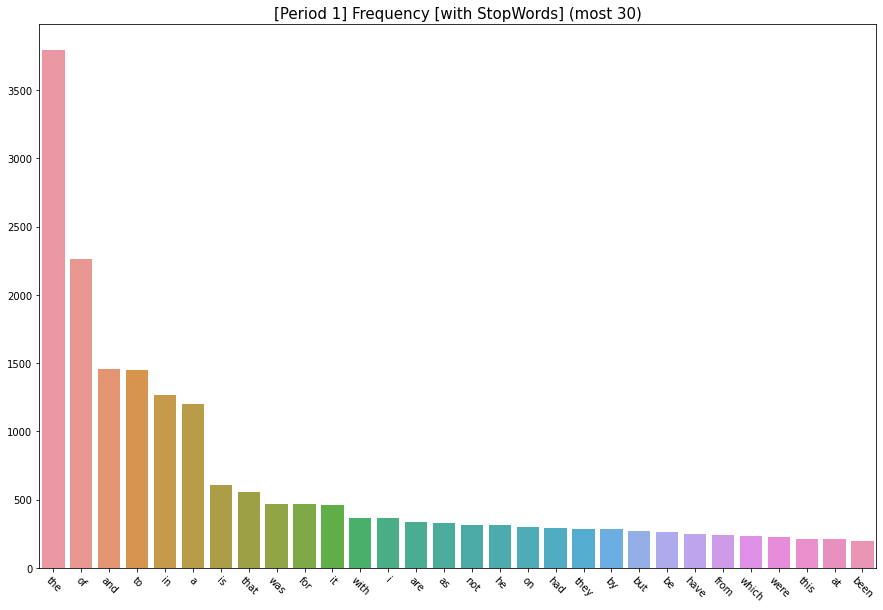

In [10]:
plotOverallFrequency(merge(tokenized_1), filepath=RESULT_1+'Frequency/', wo=False, period=1)

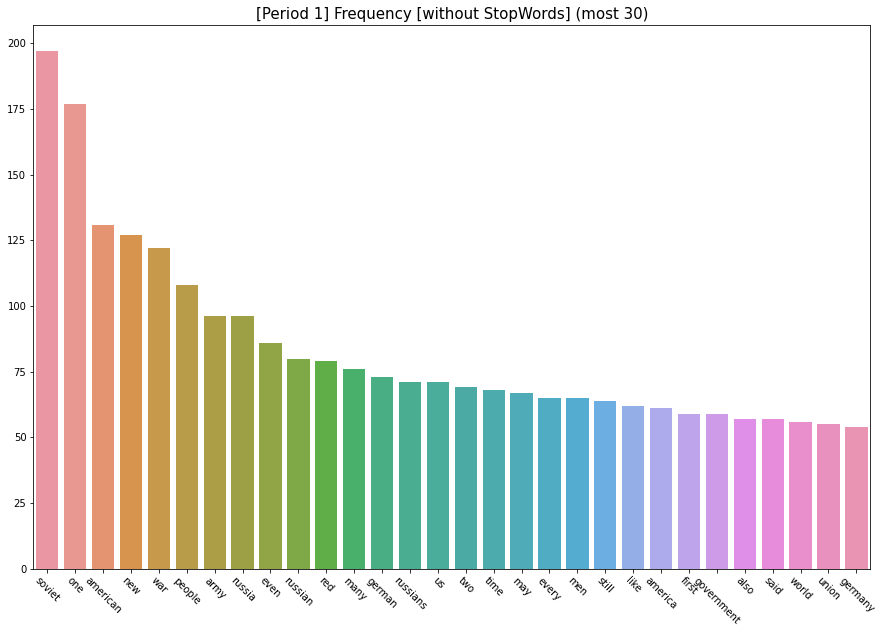

In [11]:
plotOverallFrequency(merge(wo_stopword_1), filepath=RESULT_1+'Frequency/', wo=True, period=1)

In [12]:
countDict_1, classDict_1 = calcTags(merge(tagged_1), tagList)
wo_countDict_1, wo_classDict_1 = calcTags(merge(tagging(wo_stopword_1)), tagList)

  0%|          | 0/57124 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/31525 [00:00<?, ?it/s]

##### 분석 2) 각 POS('noun', 'verb', ...)별 분포와 비율

In [13]:
showCountNRate(countDict_1, "with Stopwords")

[with Stopwords]
-------------------------
전체 토큰 수 | 57124개
[noun] 토큰 수 : 15441개 | 비율 : 27.03%
[pronoun] 토큰 수 : 2147개 | 비율 : 3.76%
[verb] 토큰 수 : 9931개 | 비율 : 17.38%
[adjective] 토큰 수 : 6573개 | 비율 : 11.51%
[adverb] 토큰 수 : 3584개 | 비율 : 6.27%
[prepnconj] 토큰 수 : 11011개 | 비율 : 19.28%
[determiner] 토큰 수 : 6606개 | 비율 : 11.56%
[interjection] 토큰 수 : 0개 | 비율 : 0.0%
[number] 토큰 수 : 382개 | 비율 : 0.67%
[foreignW] 토큰 수 : 18개 | 비율 : 0.03%
[modal] 토큰 수 : 606개 | 비율 : 1.06%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiveS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [14]:
showCountNRate(wo_countDict_1, "without Stopwords")

[without Stopwords]
-------------------------
전체 토큰 수 | 31525개
[noun] 토큰 수 : 13967개 | 비율 : 44.3%
[pronoun] 토큰 수 : 106개 | 비율 : 0.34%
[verb] 토큰 수 : 6460개 | 비율 : 20.49%
[adjective] 토큰 수 : 7303개 | 비율 : 23.17%
[adverb] 토큰 수 : 2360개 | 비율 : 7.49%
[prepnconj] 토큰 수 : 679개 | 비율 : 2.15%
[determiner] 토큰 수 : 132개 | 비율 : 0.42%
[interjection] 토큰 수 : 1개 | 비율 : 0.0%
[number] 토큰 수 : 397개 | 비율 : 1.26%
[foreignW] 토큰 수 : 25개 | 비율 : 0.08%
[modal] 토큰 수 : 82개 | 비율 : 0.26%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiveS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [15]:
tag2csv(countDict_1, classDict_1, tagList, RESULT_1 +'Frequency-in-POS/' + "Frequency over POS-withstopword")
tag2csv(wo_countDict_1, wo_classDict_1, tagList, RESULT_1 +'Frequency-in-POS/' + "Frequency over POS-withoutstopword")

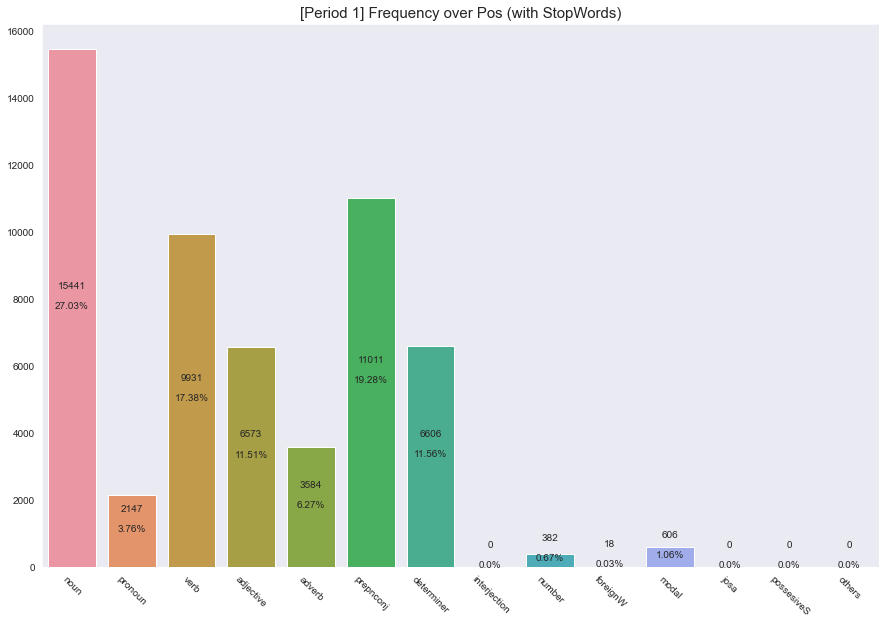

In [16]:
count, labels = CountNLabelOverPOS(countDict_1)

plotTagFrequency(count, labels, "[Period 1] Frequency over Pos (with StopWords)", RESULT_1+'Frequency-in-POS/', wo=False)

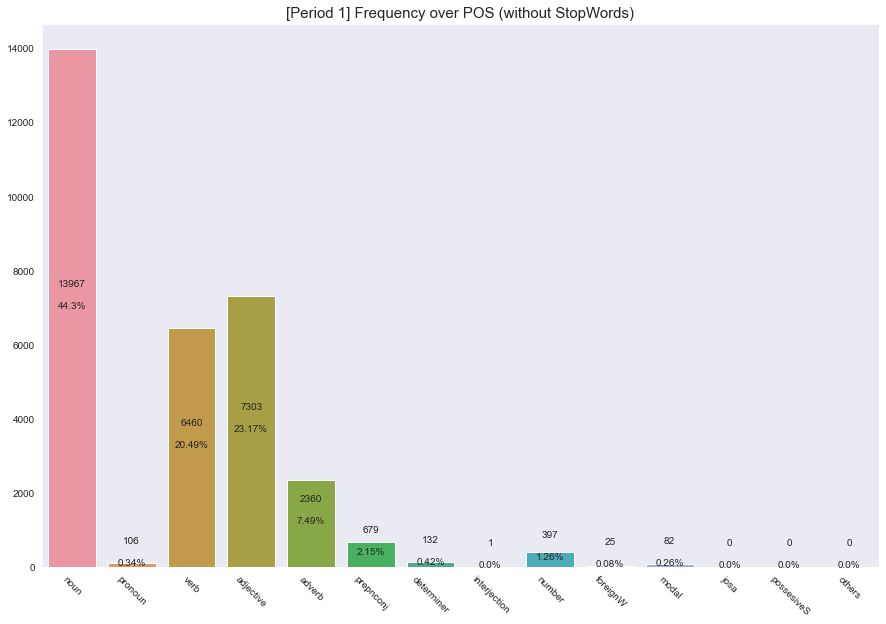

In [17]:
count, labels = CountNLabelOverPOS(wo_countDict_1)

plotTagFrequency(count, labels, "[Period 1] Frequency over POS (without StopWords)", RESULT_1+'Frequency-in-POS/', wo=True)

##### 분석 3) 'noun'인 token들의 Frequncy (상위 30개)

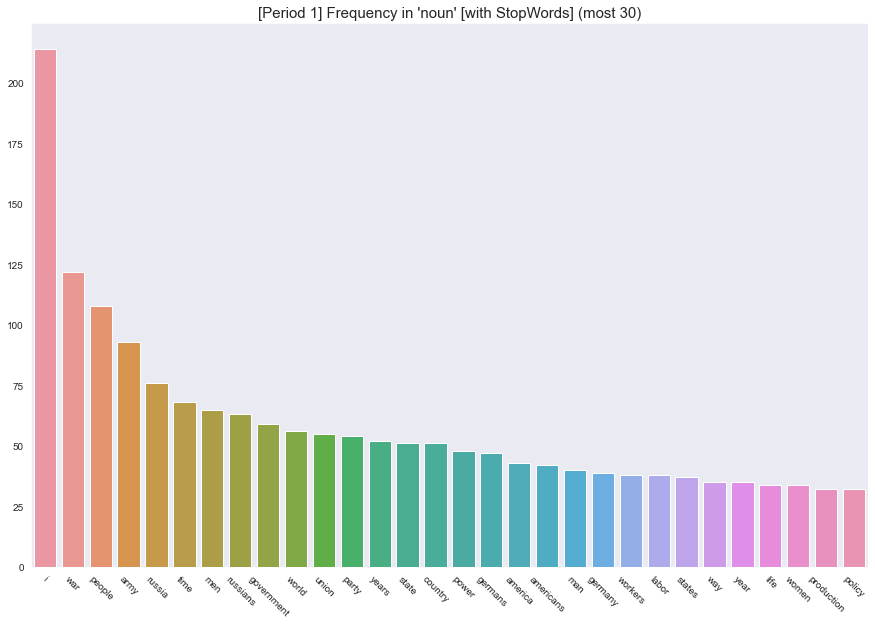

In [18]:
plotPOSFrequency(classDict_1, filepath=RESULT_1+'Frequency-in-noun/', pos='noun', wo=False, period=1)

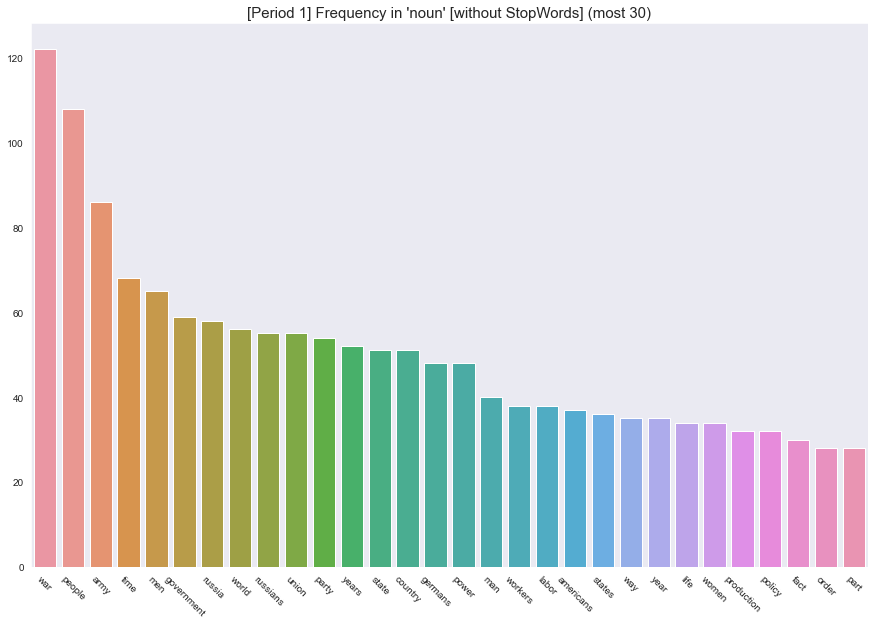

In [19]:
plotPOSFrequency(wo_classDict_1, filepath=RESULT_1+'Frequency-in-noun/', pos='noun', wo=True, period=1)

##### 분석 4) 'verb'인 token들의 Frequncy (상위 30개)

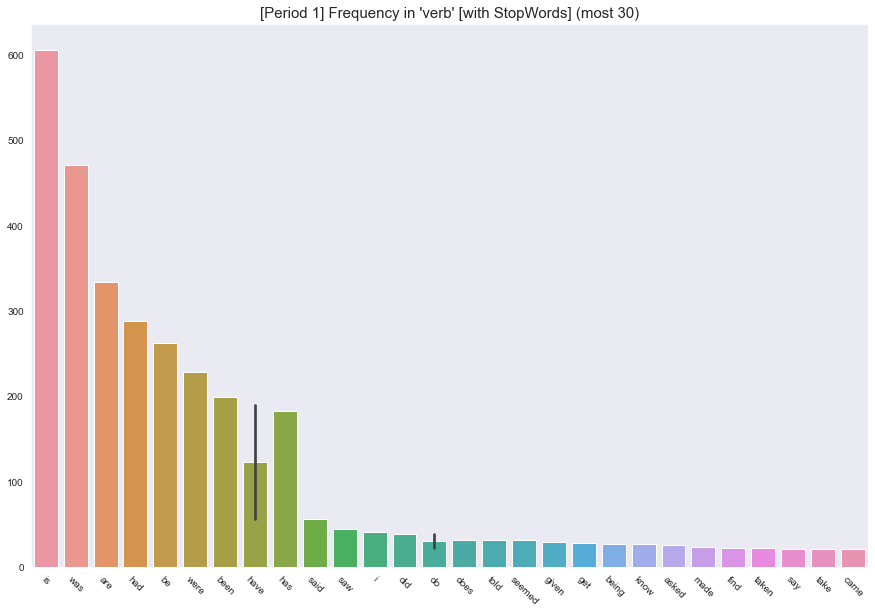

In [20]:
plotPOSFrequency(classDict_1, filepath=RESULT_1+'Frequency-in-verb/', pos='verb', wo=False, period=1)

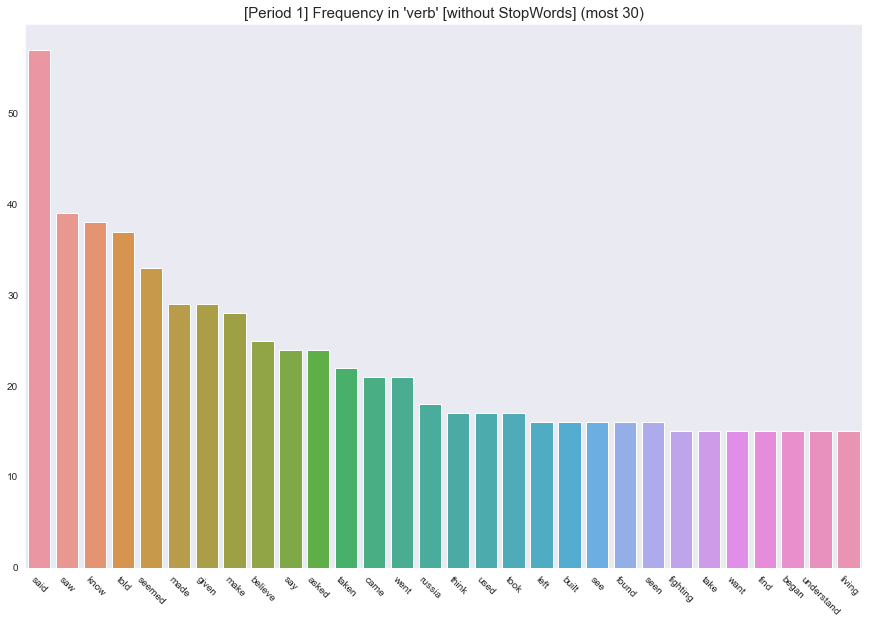

In [21]:
plotPOSFrequency(wo_classDict_1, filepath=RESULT_1+'Frequency-in-verb/', pos='verb', wo=True, period=1)

##### 분석 5) 'adjective'인 token들의 Frequncy (상위 30개)

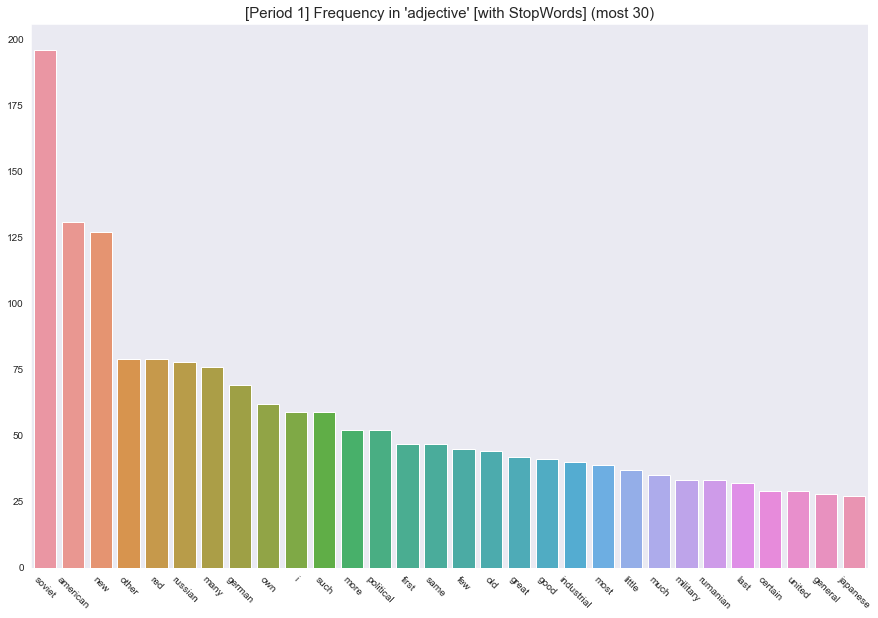

In [22]:
plotPOSFrequency(classDict_1, filepath=RESULT_1+'Frequency-in-adjective/', pos='adjective', wo=False, period=1)

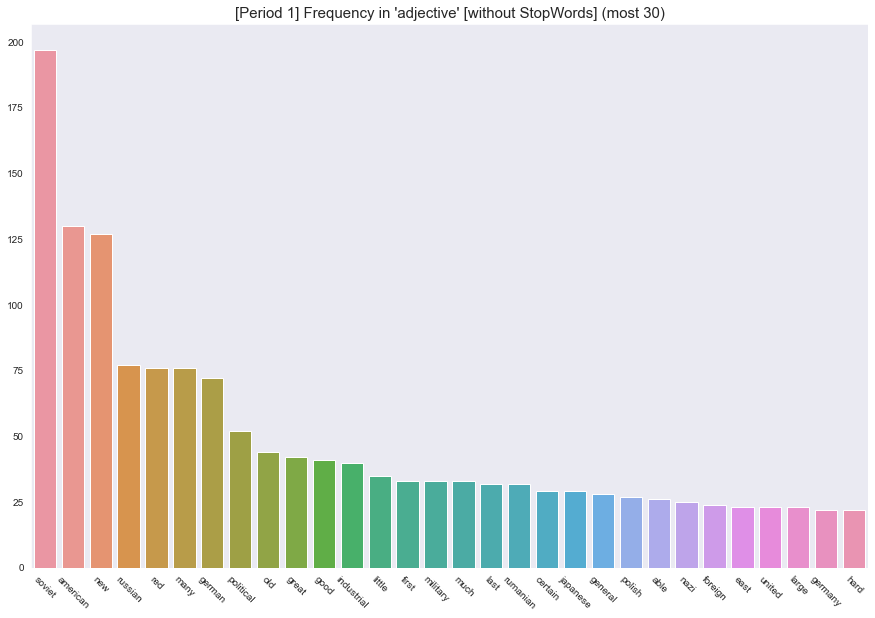

In [23]:
plotPOSFrequency(wo_classDict_1, filepath=RESULT_1+'Frequency-in-adjective/', pos='adjective', wo=True, period=1)

#### Period 2

##### 분석 1) 전체 Text에서의 Frequency (상위 30개)

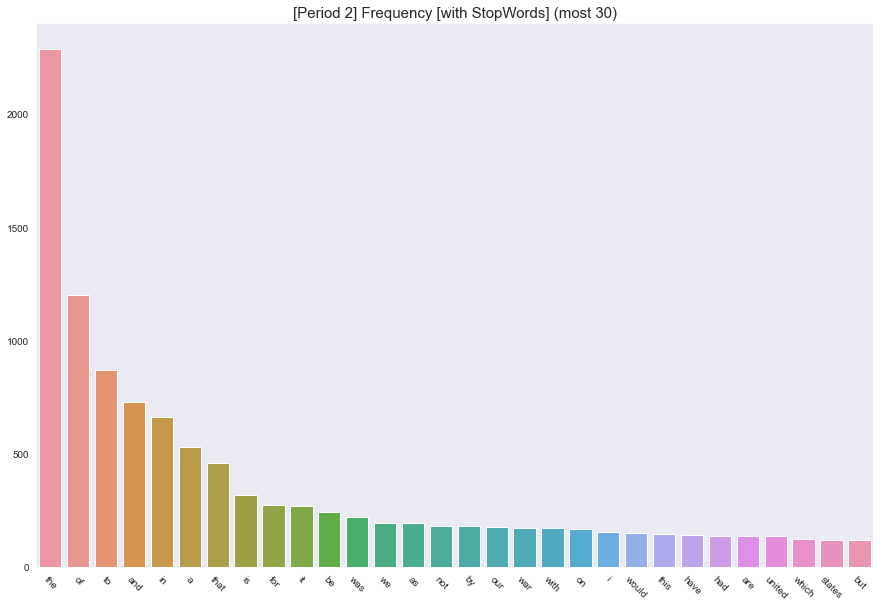

In [24]:
plotOverallFrequency(merge(tokenized_2), filepath=RESULT_2+'Frequency/', wo=False, period=2)

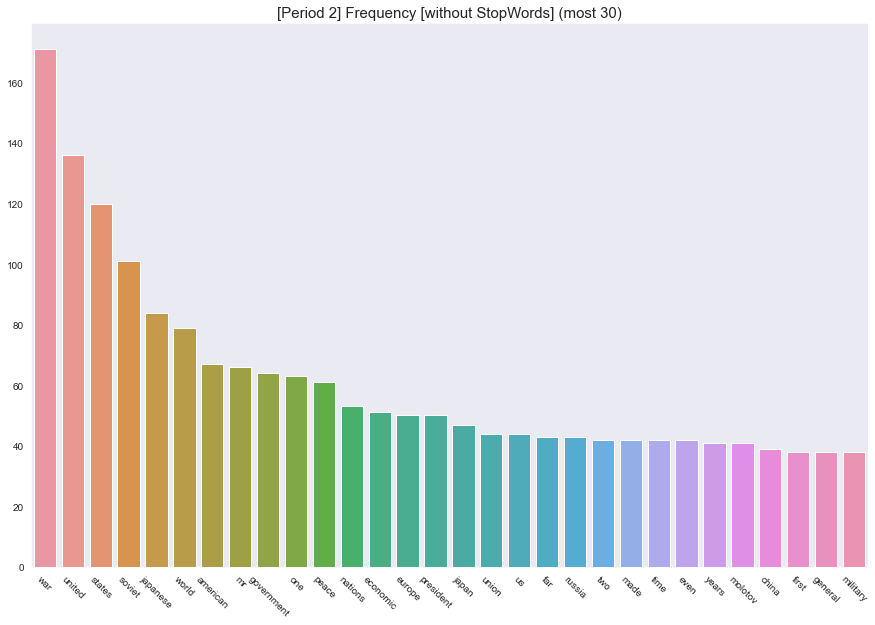

In [25]:
plotOverallFrequency(merge(wo_stopword_2), filepath=RESULT_2+'Frequency/', wo=True, period=2)

In [26]:
countDict_2, classDict_2 = calcTags(merge(tagged_2), tagList)
wo_countDict_2, wo_classDict_2 = calcTags(merge(tagging(wo_stopword_2)), tagList)

  0%|          | 0/31307 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/17522 [00:00<?, ?it/s]

##### 분석 2) 각 POS('noun', 'verb', ...)별 분포와 비율

In [27]:
showCountNRate(countDict_2, "with Stopwords")

[with Stopwords]
-------------------------
전체 토큰 수 | 31307개
[noun] 토큰 수 : 8707개 | 비율 : 27.81%
[pronoun] 토큰 수 : 943개 | 비율 : 3.01%
[verb] 토큰 수 : 5388개 | 비율 : 17.21%
[adjective] 토큰 수 : 3678개 | 비율 : 11.75%
[adverb] 토큰 수 : 1646개 | 비율 : 5.26%
[prepnconj] 토큰 수 : 6073개 | 비율 : 19.4%
[determiner] 토큰 수 : 3686개 | 비율 : 11.77%
[interjection] 토큰 수 : 0개 | 비율 : 0.0%
[number] 토큰 수 : 189개 | 비율 : 0.6%
[foreignW] 토큰 수 : 8개 | 비율 : 0.03%
[modal] 토큰 수 : 525개 | 비율 : 1.68%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiveS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [28]:
showCountNRate(wo_countDict_2, "with Stopwords")

[with Stopwords]
-------------------------
전체 토큰 수 | 17522개
[noun] 토큰 수 : 8044개 | 비율 : 45.91%
[pronoun] 토큰 수 : 64개 | 비율 : 0.37%
[verb] 토큰 수 : 3478개 | 비율 : 19.85%
[adjective] 토큰 수 : 4114개 | 비율 : 23.48%
[adverb] 토큰 수 : 1104개 | 비율 : 6.3%
[prepnconj] 토큰 수 : 380개 | 비율 : 2.17%
[determiner] 토큰 수 : 67개 | 비율 : 0.38%
[interjection] 토큰 수 : 0개 | 비율 : 0.0%
[number] 토큰 수 : 195개 | 비율 : 1.11%
[foreignW] 토큰 수 : 19개 | 비율 : 0.11%
[modal] 토큰 수 : 54개 | 비율 : 0.31%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiveS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [29]:
tag2csv(countDict_2, classDict_2, tagList, RESULT_2 +'Frequency-in-POS/' + "Frequency over POS-withstopword")
tag2csv(wo_countDict_2, wo_classDict_2, tagList, RESULT_2 +'Frequency-in-POS/' + "Frequency over POS-withoutstopword")

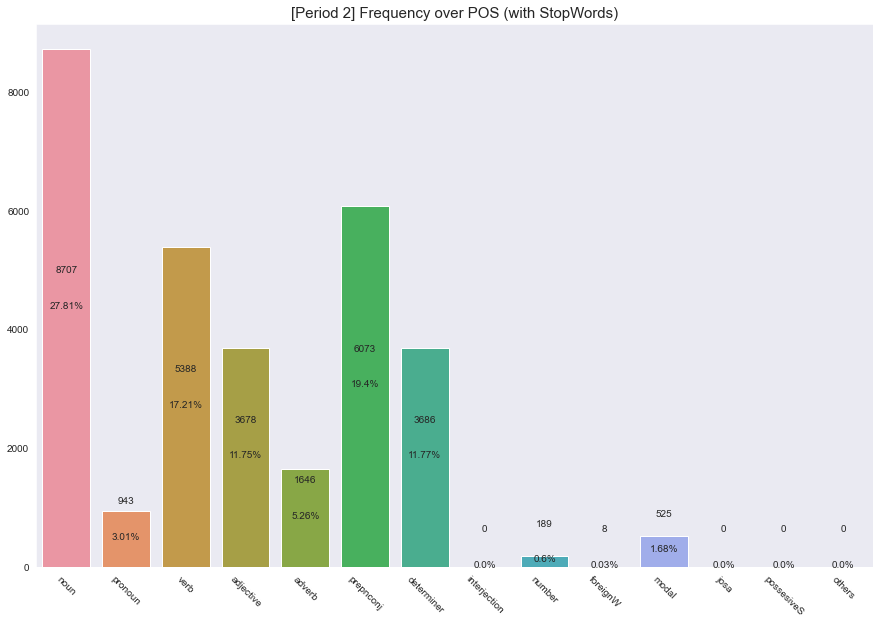

In [30]:
count, labels = CountNLabelOverPOS(countDict_2)

plotTagFrequency(count, labels, "[Period 2] Frequency over POS (with StopWords)", RESULT_2+'Frequency-in-POS/', wo=False)

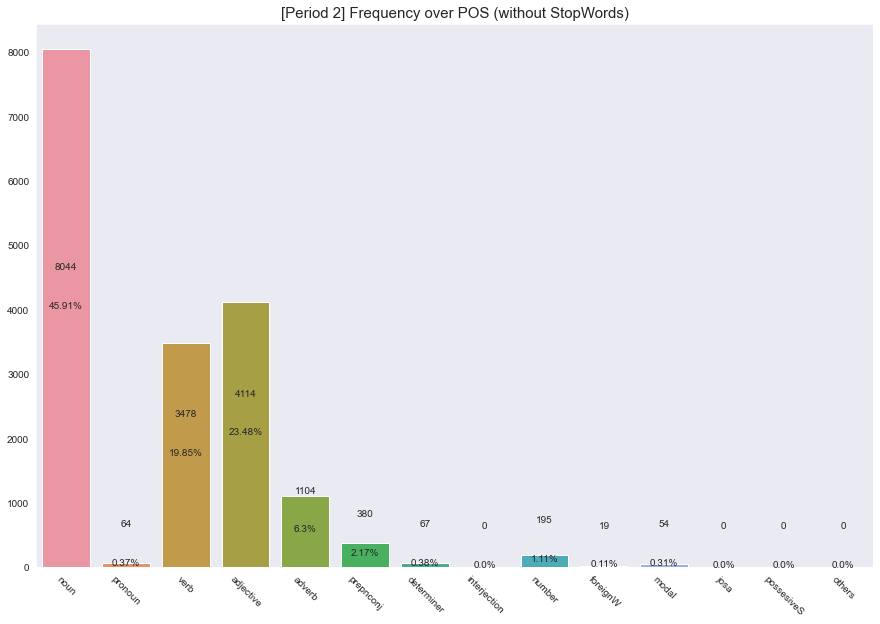

In [31]:
count, labels = CountNLabelOverPOS(wo_countDict_2)

plotTagFrequency(count, labels, "[Period 2] Frequency over POS (without StopWords)", RESULT_2+'Frequency-in-POS/', wo=True)

##### 분석 3) 'noun'인 token들의 Frequncy (상위 30개)

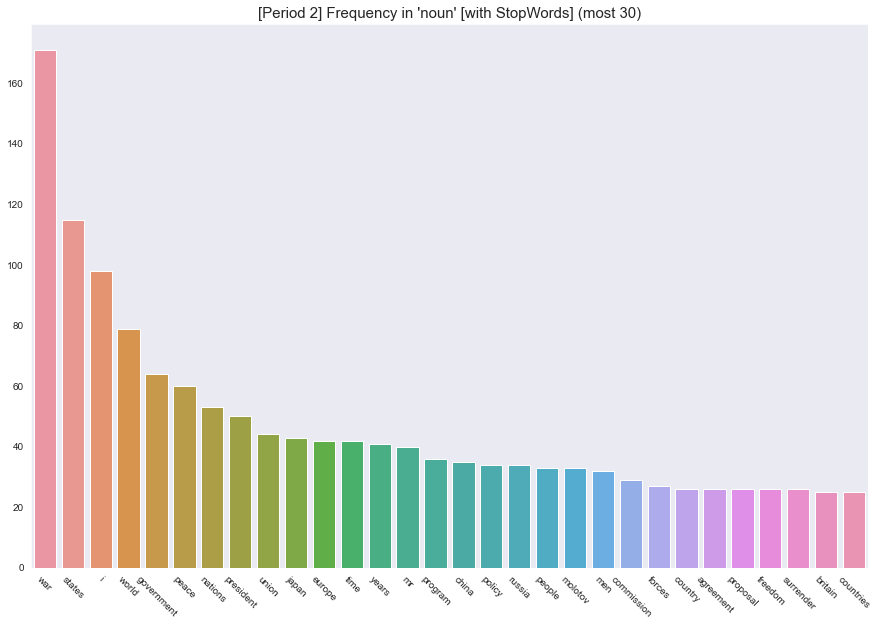

In [32]:
plotPOSFrequency(classDict_2, filepath=RESULT_2+'Frequency-in-noun/', pos='noun', wo=False, period=2)

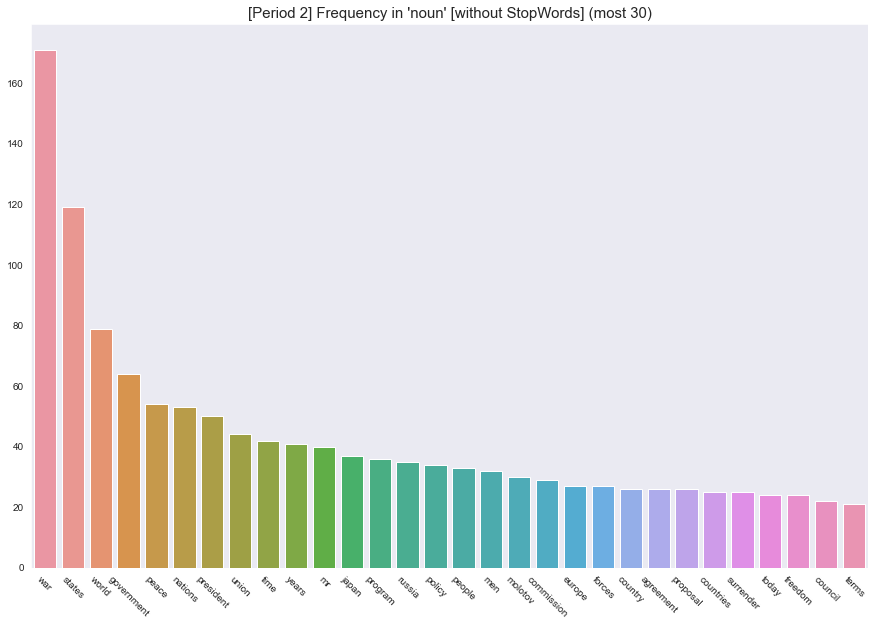

In [33]:
plotPOSFrequency(wo_classDict_2, filepath=RESULT_2+'Frequency-in-noun/', pos='noun', wo=True, period=2)

##### 분석 4) 'verb'인 token들의 Frequncy (상위 30개)

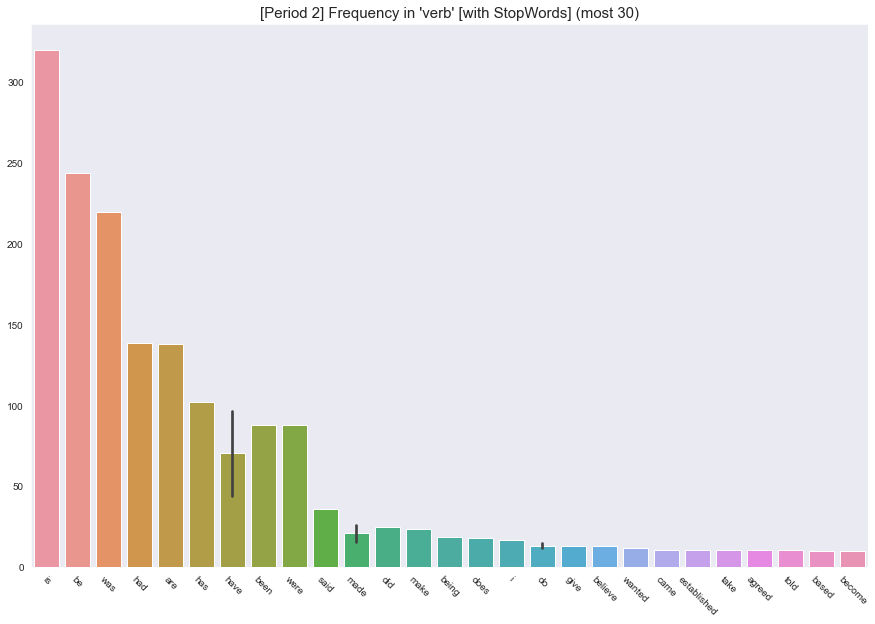

In [34]:
plotPOSFrequency(classDict_2, filepath=RESULT_2+'Frequency-in-verb/', pos='verb', wo=False, period=2)

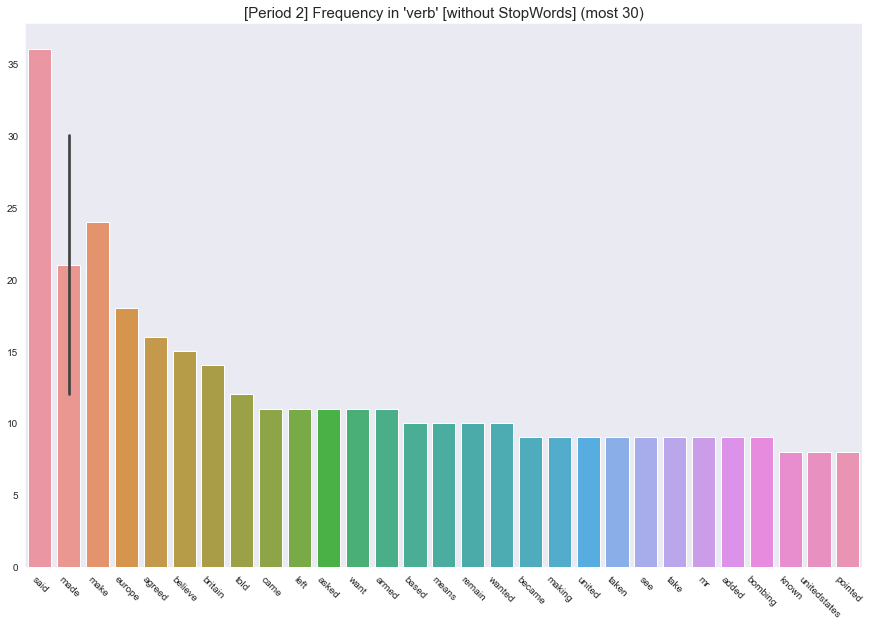

In [35]:
plotPOSFrequency(wo_classDict_2, filepath=RESULT_2+'Frequency-in-verb/', pos='verb', wo=True, period=2)

##### 분석 5) 'adjective'인 token들의 Frequncy (상위 30개)

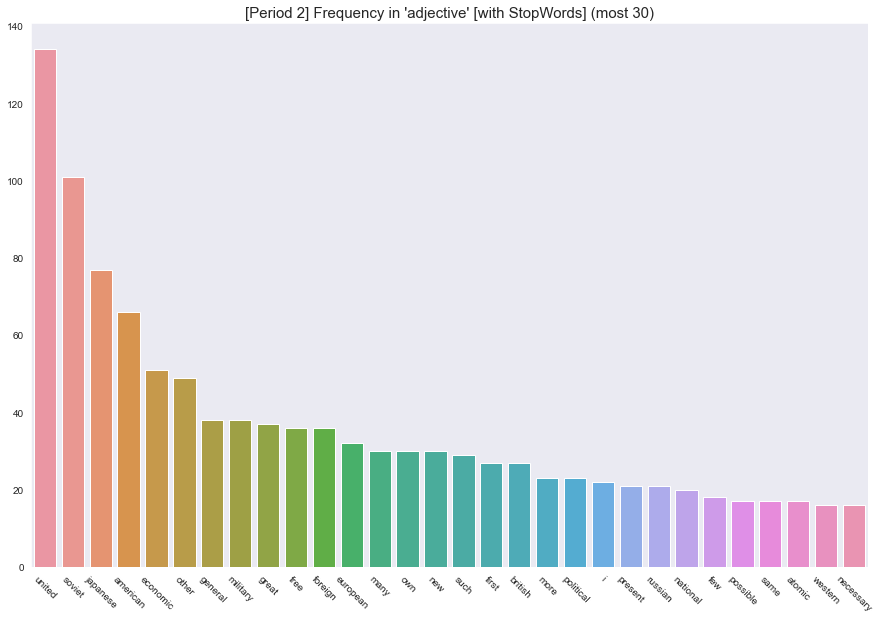

In [36]:
plotPOSFrequency(classDict_2, filepath=RESULT_2+'Frequency-in-adjective/', pos='adjective', wo=False, period=2)

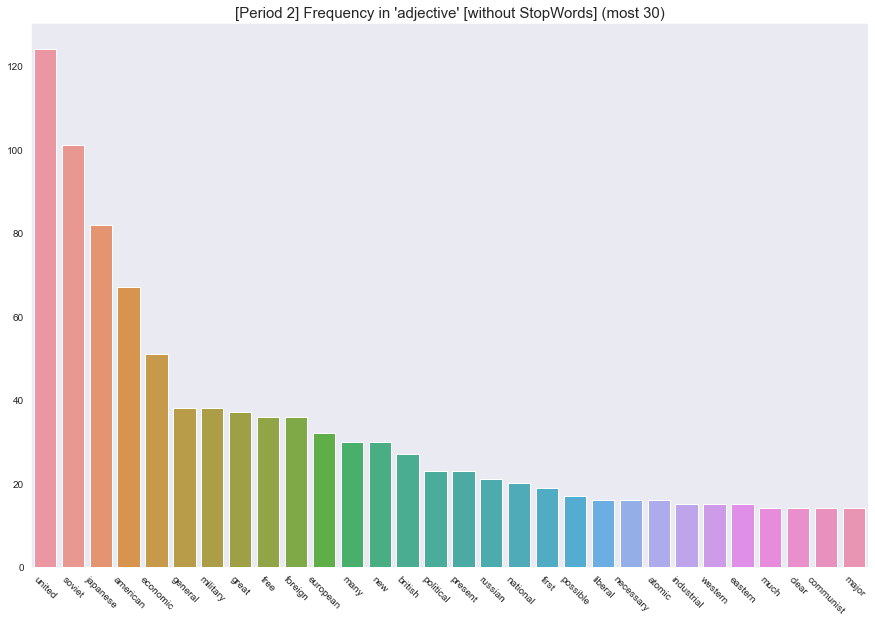

In [37]:
plotPOSFrequency(wo_classDict_2, filepath=RESULT_2+'Frequency-in-adjective/', pos='adjective', wo=True, period=2)

#### Period 3

##### 분석 1) 전체 Text에서의 Frequency (상위 30개)

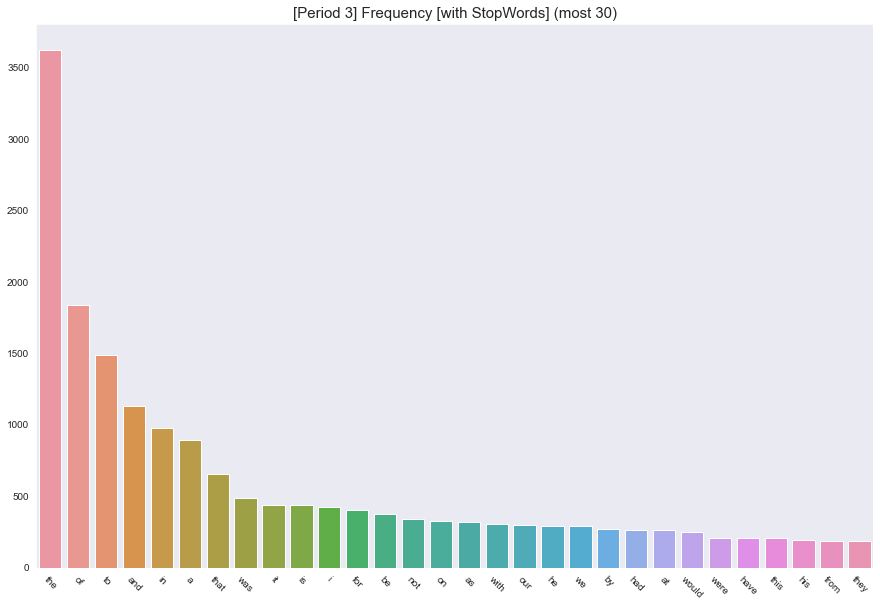

In [38]:
plotOverallFrequency(merge(tokenized_3), filepath=RESULT_3+'Frequency/', wo=False, period=3)

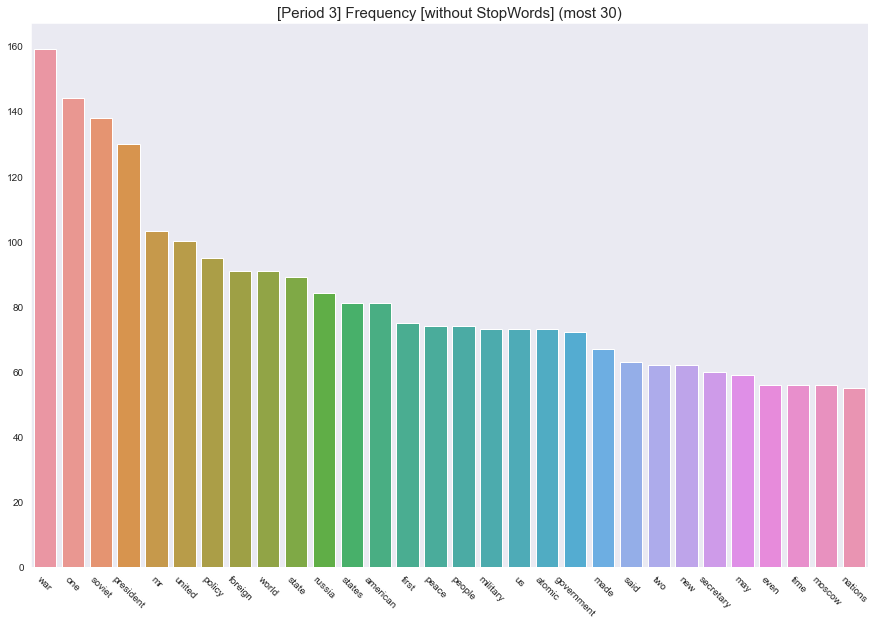

In [39]:
plotOverallFrequency(merge(wo_stopword_3), filepath=RESULT_3+'Frequency/', wo=True, period=3)

In [40]:
countDict_3, classDict_3 = calcTags(merge(tagged_3), tagList)
wo_countDict_3, wo_classDict_3 = calcTags(merge(tagging(wo_stopword_3)), tagList)

  0%|          | 0/52151 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/29040 [00:00<?, ?it/s]

##### 분석 2) 각 POS('noun', 'verb', ...)별 분포와 비율

In [41]:
showCountNRate(countDict_3, "with Stopwords")

[with Stopwords]
-------------------------
전체 토큰 수 | 52151개
[noun] 토큰 수 : 14548개 | 비율 : 27.9%
[pronoun] 토큰 수 : 1870개 | 비율 : 3.59%
[verb] 토큰 수 : 9237개 | 비율 : 17.71%
[adjective] 토큰 수 : 5728개 | 비율 : 10.98%
[adverb] 토큰 수 : 3018개 | 비율 : 5.79%
[prepnconj] 토큰 수 : 9699개 | 비율 : 18.6%
[determiner] 토큰 수 : 5961개 | 비율 : 11.43%
[interjection] 토큰 수 : 2개 | 비율 : 0.0%
[number] 토큰 수 : 316개 | 비율 : 0.61%
[foreignW] 토큰 수 : 28개 | 비율 : 0.05%
[modal] 토큰 수 : 878개 | 비율 : 1.68%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiveS] 토큰 수 : 1개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [42]:
showCountNRate(wo_countDict_3, "without Stopwords")

[without Stopwords]
-------------------------
전체 토큰 수 | 29040개
[noun] 토큰 수 : 13381개 | 비율 : 46.08%
[pronoun] 토큰 수 : 124개 | 비율 : 0.43%
[verb] 토큰 수 : 5941개 | 비율 : 20.46%
[adjective] 토큰 수 : 6497개 | 비율 : 22.37%
[adverb] 토큰 수 : 1882개 | 비율 : 6.48%
[prepnconj] 토큰 수 : 642개 | 비율 : 2.21%
[determiner] 토큰 수 : 87개 | 비율 : 0.3%
[interjection] 토큰 수 : 2개 | 비율 : 0.01%
[number] 토큰 수 : 336개 | 비율 : 1.16%
[foreignW] 토큰 수 : 43개 | 비율 : 0.15%
[modal] 토큰 수 : 97개 | 비율 : 0.33%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiveS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [43]:
tag2csv(countDict_1, classDict_3, tagList, RESULT_3 +'Frequency-in-POS/' + "Frequency over POS-withstopword")
tag2csv(wo_countDict_1, wo_classDict_3, tagList, RESULT_3 +'Frequency-in-POS/' + "Frequency over POS-withoutstopword")

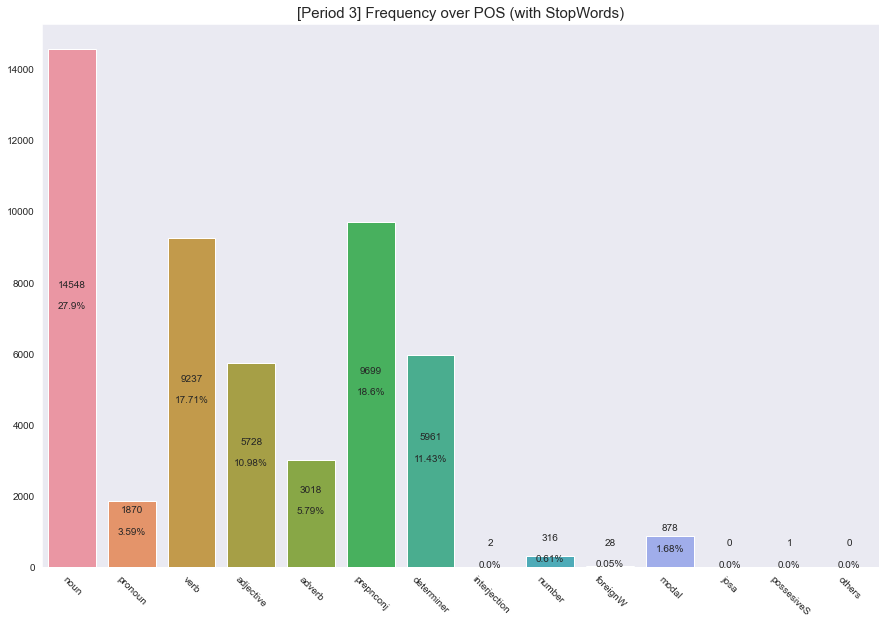

In [44]:
count, labels = CountNLabelOverPOS(countDict_3)

plotTagFrequency(count, labels, "[Period 3] Frequency over POS (with StopWords)", RESULT_3+'Frequency-in-POS/', wo=False)

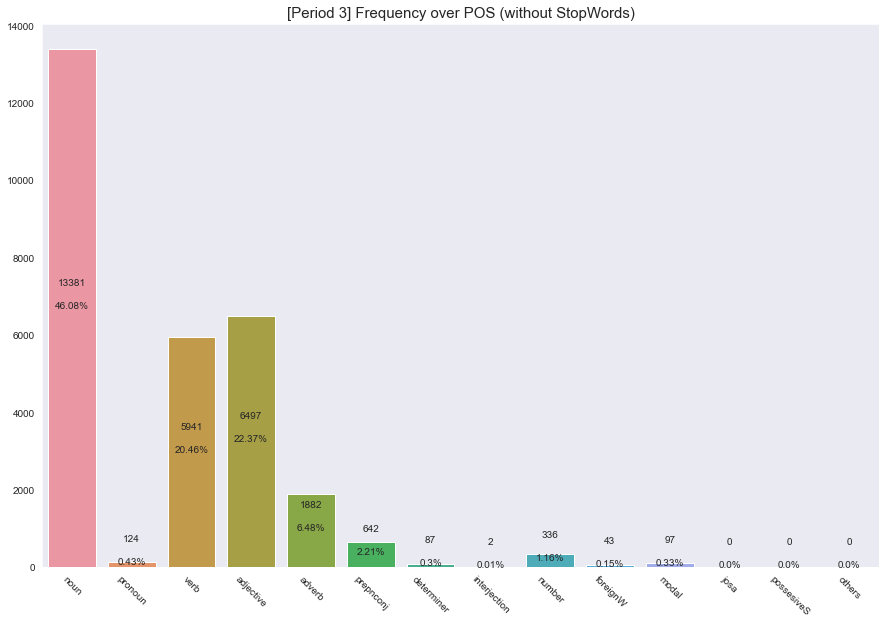

In [45]:
count, labels = CountNLabelOverPOS(wo_countDict_3)

plotTagFrequency(count, labels, "[Period 3] Frequency over POS (without StopWords)", RESULT_3+'Frequency-in-POS/', wo=True)

##### 분석 3) 'noun'인 token들의 Frequncy (상위 30개)

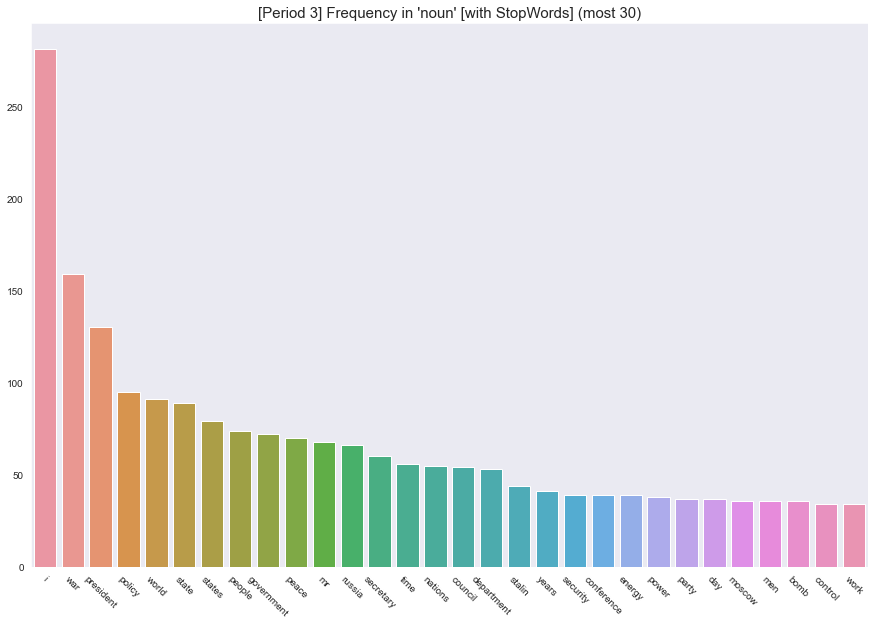

In [46]:
plotPOSFrequency(classDict_3, filepath=RESULT_3+'Frequency-in-noun/', pos='noun', wo=False, period=3)

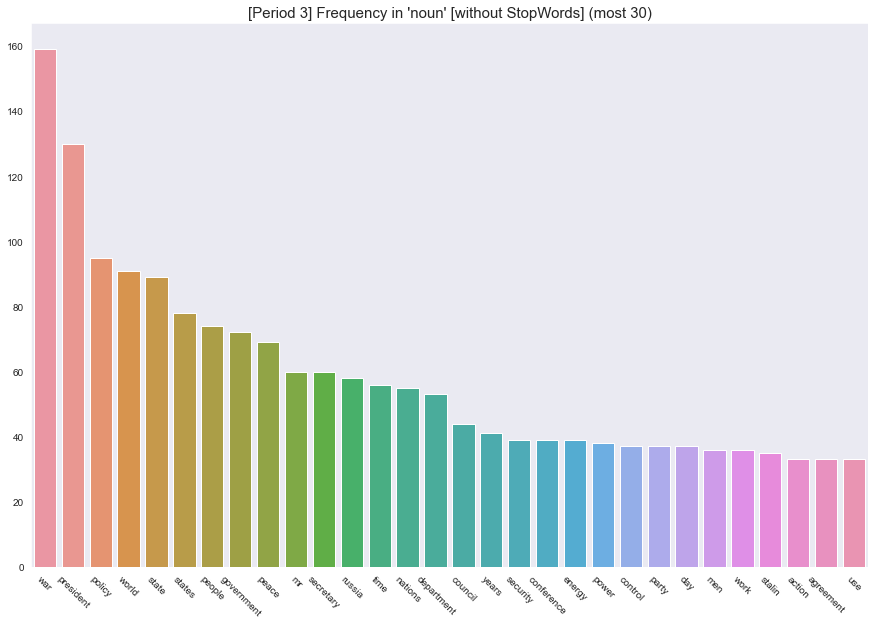

In [47]:
plotPOSFrequency(wo_classDict_3, filepath=RESULT_3+'Frequency-in-noun/', pos='noun', wo=True, period=3)

##### 분석 4) 'verb'인 token들의 Frequncy (상위 30개)

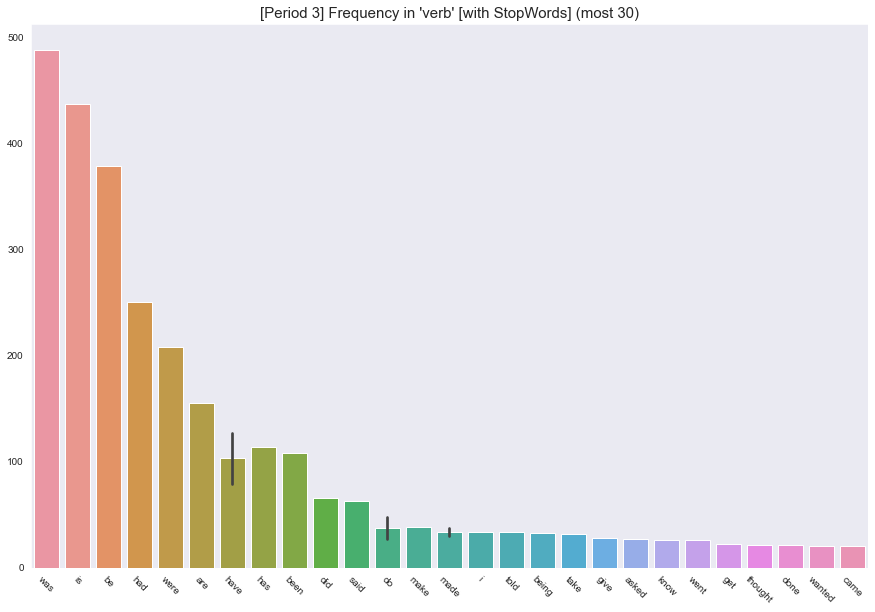

In [48]:
plotPOSFrequency(classDict_3, filepath=RESULT_3+'Frequency-in-verb/', pos='verb', wo=False, period=3)

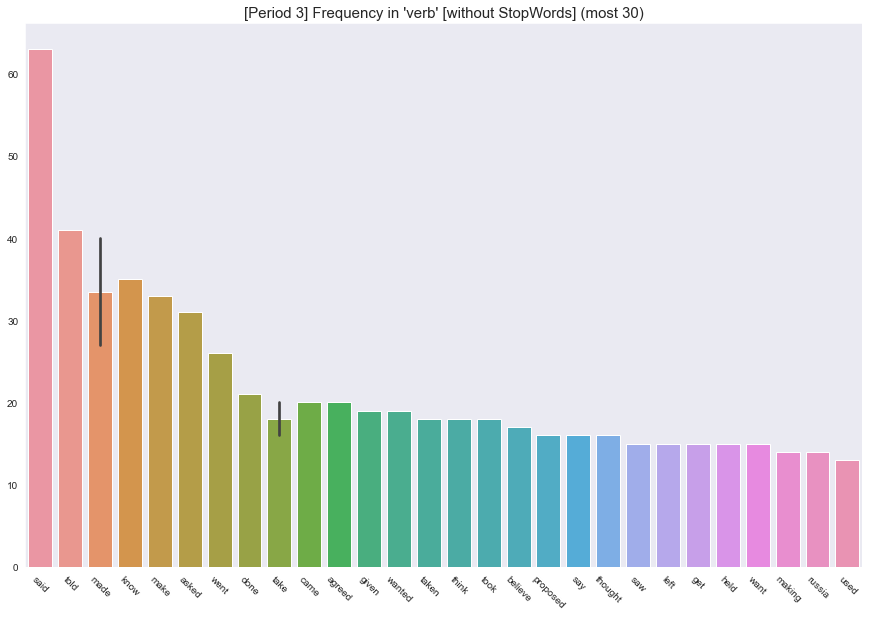

In [49]:
plotPOSFrequency(wo_classDict_3, filepath=RESULT_3+'Frequency-in-verb/', pos='verb', wo=True, period=3)

##### 분석 5) 'adjective'인 token들의 Frequncy (상위 30개)

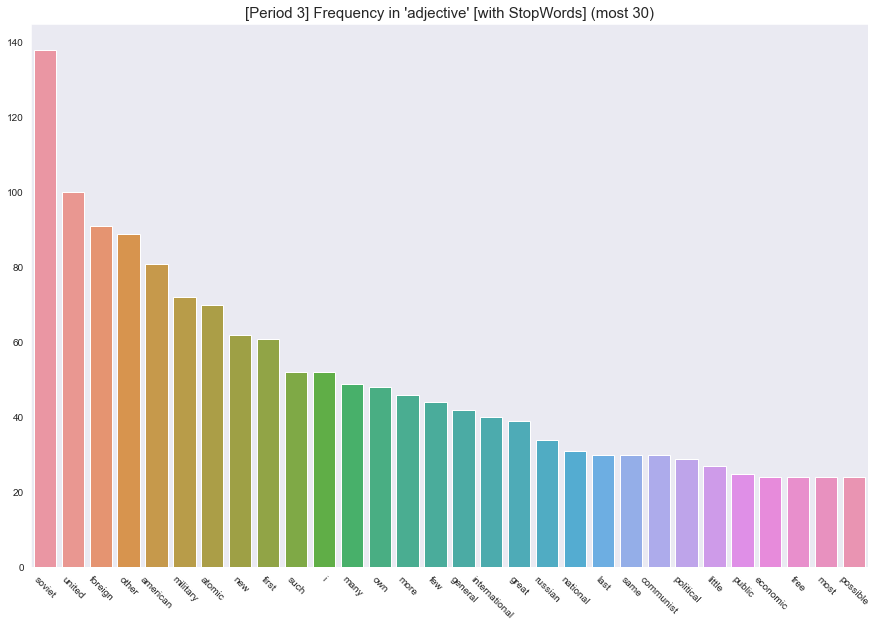

In [50]:
plotPOSFrequency(classDict_3, filepath=RESULT_3+'Frequency-in-adjective/', pos='adjective', wo=False, period=3)

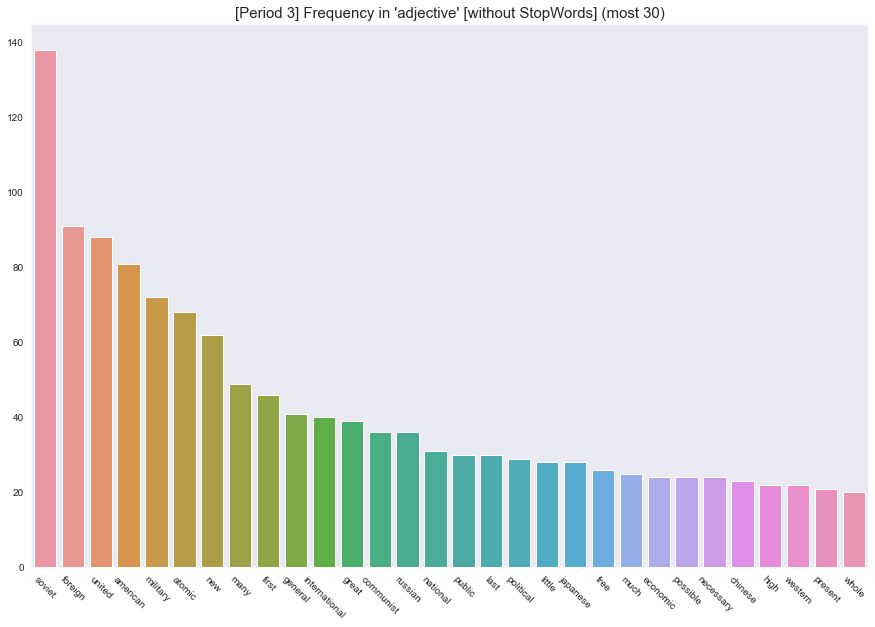

In [51]:
plotPOSFrequency(wo_classDict_3, filepath=RESULT_3+'Frequency-in-adjective/', pos='adjective', wo=True, period=3)

### 4-2. WordCloud

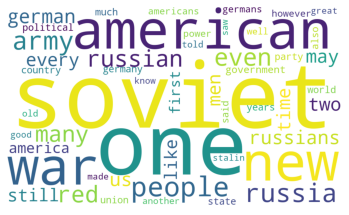

In [52]:
plotWordCloud(merge(wo_stopword_1), filepath=RESULT_1)

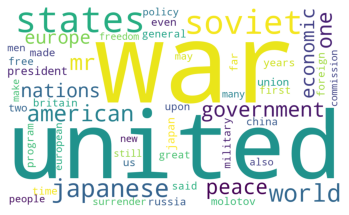

In [53]:
plotWordCloud(merge(wo_stopword_2), filepath=RESULT_2)

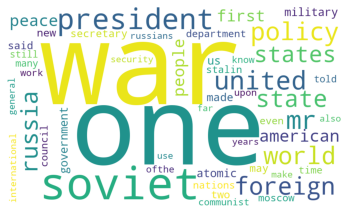

In [54]:
plotWordCloud(merge(wo_stopword_3), filepath=RESULT_3)

### 4-3. Topic Modeling

#### Define Hyperparameter

In [55]:
NUM_TOPICS = 10
NUM_TOPIC_WORDS = 30

#### Period 1

In [56]:
Corp, Dict = buildDTM(wo_stopword_1)
model = models.ldamodel.LdaModel(Corp, num_topics = NUM_TOPICS, id2word=Dict)
topicdf = topicWords(model, NUM_TOPIC_WORDS)
data = visualizeLDA(model, Corp, Dict)

data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.004889 -0.002158       1        1  31.803747
8     -0.002856 -0.000242       2        1  26.166742
9     -0.005693  0.003001       3        1  13.223841
0      0.001793  0.007332       4        1  12.964447
1      0.006538 -0.000310       5        1   7.924624
3     -0.001899 -0.005449       6        1   4.957037
6      0.001897  0.000370       7        1   1.967566
4     -0.004359  0.000150       8        1   0.985571
5     -0.002688 -0.002338       9        1   0.003212
7      0.002379 -0.000357      10        1   0.003212, topic_info=            Term        Freq       Total Category  logprob  loglift
3875      soviet  139.000000  139.000000  Default  30.0000  30.0000
1003         one  141.000000  141.000000  Default  29.0000  29.0000
50      american  111.000000  111.000000  Default  28.0000  28.0000
1626         war   93.000000   93.000000  Default  27.0000  27.0000
953          new   95.000000   95.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1579         two    0.001380   51.731820  Topic10  -6.5984  -0.1859
458         even    0.001546   64.646396  Topic10  -6.4844  -0.2947
1251     russian    0.001499   63.095501  Topic10  -6.5157  -0.3018
1605          us    0.001362   52.504252  Topic10  -6.6111  -0.2135
623   government    0.001120   46.738272  Topic10  -6.8068  -0.2928

[816 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
7895      1  0.216127  abolished
7895      2  0.432255  abolished
7895      3  0.216127  abolished
7895      4  0.216127  abolished
4442      1  0.288482  abundance
...     ...       ...        ...
1684      2  0.298093      young
1684      3  0.178856      young
1684      4  0.119237      young
1684      5  0.059619      young
1684      6  0.059619      young

[1630 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 10, 1, 2, 4, 7, 5, 6, 8])

#### Period 2

In [57]:
Corp, Dict = buildDTM(wo_stopword_2)
model = models.ldamodel.LdaModel(Corp, num_topics = NUM_TOPICS, id2word=Dict)
topicdf = topicWords(model, NUM_TOPIC_WORDS)
data = visualizeLDA(model, Corp, Dict)

data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.007418  0.001983       1        1  43.294783
5      0.013122  0.000857       2        1  24.957533
4     -0.004252  0.004654       3        1  10.927333
9      0.005215 -0.000275       4        1  10.179010
7     -0.004133  0.003201       5        1   5.420110
2      0.007462  0.002090       6        1   5.198266
0     -0.005595 -0.001711       7        1   0.005741
6     -0.001731 -0.001470       8        1   0.005741
3     -0.001639 -0.000938       9        1   0.005741
1     -0.001032 -0.008392      10        1   0.005741, topic_info=           Term        Freq       Total Category  logprob  loglift
1320        war  127.000000  127.000000  Default  30.0000  30.0000
1277     united  106.000000  106.000000  Default  29.0000  29.0000
1111     soviet   80.000000   80.000000  Default  28.0000  28.0000
1126     states   90.000000   90.000000  Default  27.0000  27.0000
4772   japanese   70.000000   70.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
937   president    0.001457   38.166462  Topic10  -6.5371  -0.4079
2996     russia    0.001241   27.264951  Topic10  -6.6975  -0.2319
881       peace    0.001306   45.526379  Topic10  -6.6469  -0.6939
668       japan    0.001269   36.540611  Topic10  -6.6756  -0.5029
797     nations    0.001279   41.851712  Topic10  -6.6680  -0.6309

[809 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
3879      1  0.436586        ability
3879      2  0.218293        ability
3879      4  0.218293        ability
6931      1  0.783044  aboutonefifth
3885      1  0.629128         accept
...     ...       ...            ...
1370      2  0.227444          years
1370      3  0.097476          years
1370      4  0.129968          years
1370      5  0.032492          years
1370      6  0.064984          years

[1222 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 5, 10, 8, 3, 1, 7, 4, 2])

#### Period 3

In [58]:
Corp, Dict = buildDTM(wo_stopword_3)
model = models.ldamodel.LdaModel(Corp, num_topics = NUM_TOPICS, id2word=Dict)
topicdf = topicWords(model, NUM_TOPIC_WORDS)
data = visualizeLDA(model, Corp, Dict)

data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.005538 -0.002178       1        1  34.229883
1      0.001716  0.008884       2        1  18.956692
2      0.005962 -0.002205       3        1  17.955974
9     -0.004131  0.002291       4        1  10.077385
6      0.001123  0.001513       5        1   6.795948
8     -0.003057 -0.003703       6        1   4.695620
3     -0.008539 -0.003685       7        1   4.302095
7      0.004422 -0.003739       8        1   2.543230
4     -0.002756  0.003127       9        1   0.439346
5     -0.000277 -0.000306      10        1   0.003828, topic_info=            Term        Freq       Total Category  logprob  loglift
1170         war  121.000000  121.000000  Default  30.0000  30.0000
725          one  109.000000  109.000000  Default  29.0000  29.0000
1707      soviet  108.000000  108.000000  Default  28.0000  28.0000
1145      united   74.000000   74.000000  Default  27.0000  27.0000
804    president  100.000000  100.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
674           mr    0.002105   74.562414  Topic10  -6.2692  -0.3044
2891  department    0.001486   41.822108  Topic10  -6.6175  -0.0745
1118        time    0.001467   40.759044  Topic10  -6.6299  -0.0612
1157          us    0.001615   56.115292  Topic10  -6.5339  -0.2849
688          new    0.001463   45.271675  Topic10  -6.6329  -0.1691

[815 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3         1  0.374442  absence
3         2  0.187221  absence
3         3  0.187221  absence
1840      1  0.399435  account
1841      1  0.495217  accused
...     ...       ...      ...
3745      5  0.133029     zone
3746      1  0.305850    zones
3746      2  0.305850    zones
3746      3  0.152925    zones
3746      5  0.152925    zones

[1716 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 10, 7, 9, 4, 8, 5, 6])

### 4-4. Netword web analysis

In [ ]:
# result = (list(apriori(tokenized_1, min_support=0.01)))